In [1]:
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import kde

%matplotlib inline


def gen_2d_kde_get_slice_fancy(val_slice,true_val,  arr_1, arr_2, bw_method=0.4, bins=100):

    S8_2d  = np.zeros( (2,len(arr_1)) )

    S8_2d[0,:] = arr_1
    S8_2d[1,:] = arr_2


    #kde_th = KernelDensity(kernel="tophat", bandwidth=0.01).fit(S8_2d)
    #kde_gauss = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(S8_2d)






    x_plot = np.linspace(np.min(arr_1), np.max(arr_1), bins)
    y_plot = np.linspace(np.min(arr_2), np.max(arr_2), bins)

    xx, yy = np.meshgrid(x_plot, y_plot)

    grid_coords = np.append(xx.reshape(-1,1),yy.reshape(-1,1),axis=1)



    #S8_2d2 = np.append(arr_1.reshape(-1,1),arr_2.reshape(-1,1),axis=1)
    kde_2 = stats.kde.gaussian_kde(S8_2d, bw_method=bw_method)




    ##### Part to get a slice of the 2D kde gaussian

    ### Specific X value


    S8_spec = val_slice
    x_plot_s = np.linspace(val_slice, val_slice, 1)
    y_plot_s = np.linspace(np.min(arr_2), np.max(arr_2), bins)

    xx_s, yy_s = np.meshgrid(x_plot_s, y_plot_s)
    grid_coords_s = np.append(xx_s.reshape(-1,1),yy_s.reshape(-1,1),axis=1)

    z_s = kde_2(grid_coords_s.T)


    ######
    ######

    
    
    plt.figure( figsize=(12,8) )
    gs1 = gridspec.GridSpec(1, 2 , width_ratios=np.array([2,1]) )
    gs1.update(wspace=0.0, hspace=0.01 ) # set the spacing between axes.


    ####find the max
    
    ax = plt.subplot(gs1[0])
    z = kde_2(grid_coords.T)
    plt.imshow(z.reshape(bins,bins),origin="lower", cmap='Reds', extent=(np.min(arr_1), np.max(arr_1), np.min(arr_2), np.max(arr_2)),
               aspect='auto')
    plt.scatter(arr_1, arr_2)
    plt.plot([val_slice,val_slice],[np.min(arr_2),np.max(arr_2)], ls='--' )
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r'$S_8^{param}$', fontsize=22)
    plt.ylabel(r'$S_8^{true}$', fontsize=22)
    plt.title('2D KDE distribution', fontsize=20)
    #### Change to the 1D posterior plot
    ax = plt.subplot(gs1[1])
    plt.fill_betweenx(y_plot_s,z_s, alpha=0.2, color='purple')
    plt.ylim(np.min(y_plot_s), np.max(y_plot_s))
    plt.xlim(0, np.max(z_s)*1.3)
    
    plt.xticks(fontsize=0.)
    ax.yaxis.tick_right()
    plt.yticks(fontsize=20.)
    plt.plot([0, np.max(z_s)*1.3 ], np.zeros(2)+true_val, ls='--', label='True')
    plt.title('Estimated Posterior', fontsize=20)
    plt.legend(fontsize=20)
    plt.show()
    
    return(y_plot_s, z_s)



In [2]:

test2 = np.load('all_S8_v2.npy', mmap_mode='r')
test3 = np.load('all_compressed_v2.npy', mmap_mode='r')


print(test2.shape)
print(test3.shape)


true_vals = np.zeros(test3.shape[0])
est_vals = np.zeros(test2.shape[0])


for ii in range(test3.shape[0]):
    
    true_vals[ii] = test3[ii]
    #true_vals[ np.int(test[ ii+1][0] -1) ] = test[ii+1][2]
    est_vals[ii] = test2[ii]
    


(99, 1)
(99, 1)


(99, 1)
(99, 1)


/var/folders/kn/gwny52y97s54b7pt8xt7bq5h0000gn/T/ipykernel_76840/3319676439.py:37: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde_2 = stats.kde.gaussian_kde(S8_2d, bw_method=bw_method)


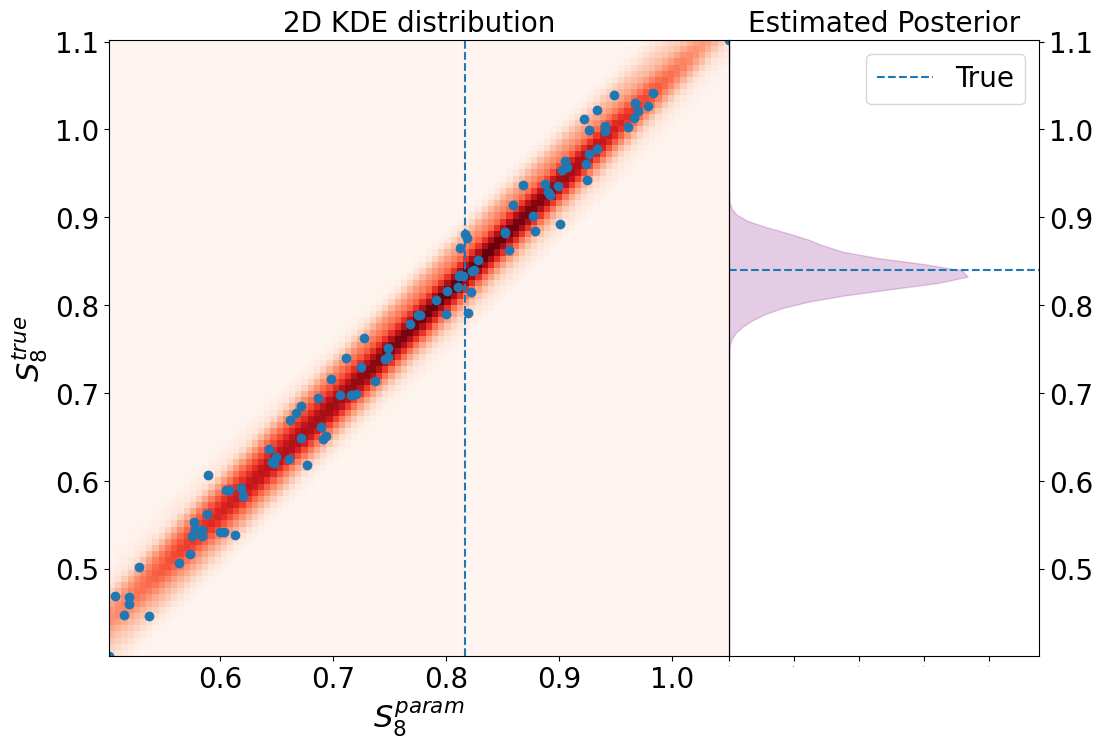

In [5]:

test2 = np.load('zall_S8.npy', mmap_mode='r')
test3 = np.load('zall_compressed.npy', mmap_mode='r')

print(test2.shape)
print(test3.shape)


true_vals = np.zeros(test3.shape[0])
est_vals = np.zeros(test2.shape[0])


for ii in range(test3.shape[0]):
    
    true_vals[ii] = test3[ii]
    #true_vals[ np.int(test[ ii+1][0] -1) ] = test[ii+1][2]
    est_vals[ii] = test2[ii]
    
    
### Set the true value and the value estimated over the parametrization

#true_val = 0.7146
#slice_val = 0.7524
slice_val=0.8171
true_val=0.8401

x_slice, y_slice = gen_2d_kde_get_slice_fancy(slice_val, true_val, true_vals,
                                              est_vals, bw_method=0.6)

(99, 1)
(99, 1)


/var/folders/kn/gwny52y97s54b7pt8xt7bq5h0000gn/T/ipykernel_76840/3319676439.py:37: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde_2 = stats.kde.gaussian_kde(S8_2d, bw_method=bw_method)


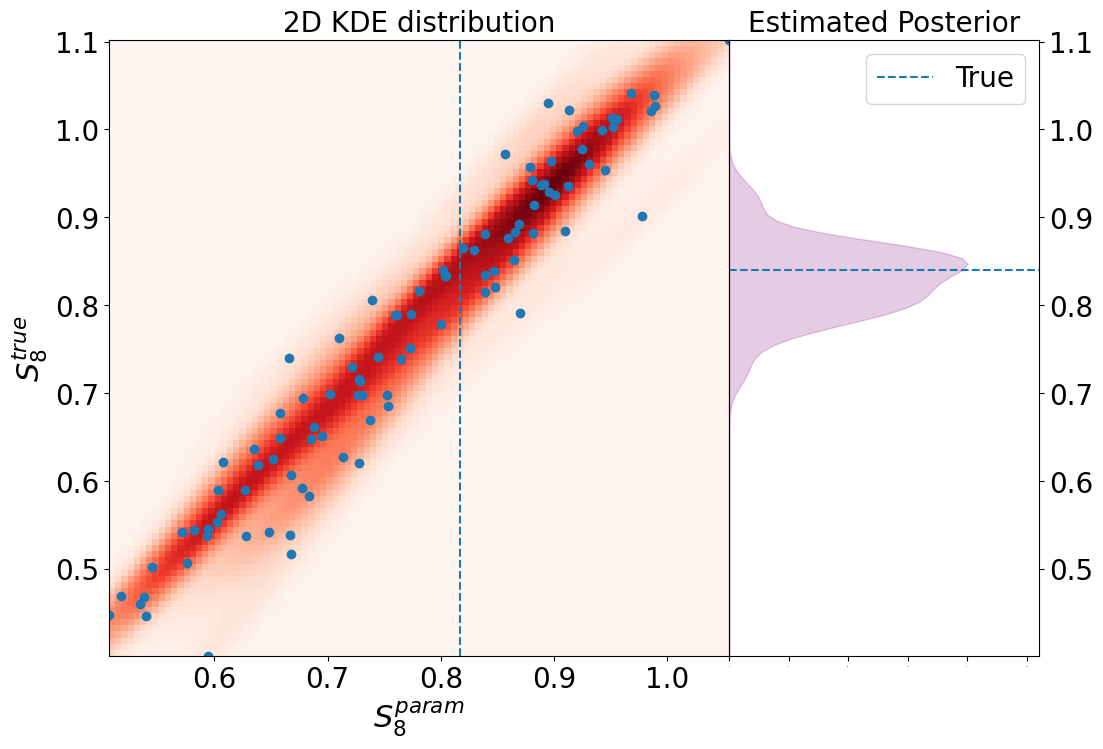

In [7]:

test2 = np.load('z1_S8.npy', mmap_mode='r')
test3 = np.load('z1_compressed.npy', mmap_mode='r')

print(test2.shape)
print(test3.shape)


true_vals = np.zeros(test3.shape[0])
est_vals = np.zeros(test2.shape[0])


for ii in range(test3.shape[0]):
    
    true_vals[ii] = test3[ii]
    #true_vals[ np.int(test[ ii+1][0] -1) ] = test[ii+1][2]
    est_vals[ii] = test2[ii]
    
    
### Set the true value and the value estimated over the parametrization

#true_val = 0.7146
#slice_val = 0.7524
slice_val=0.8171
true_val=0.8401

x_slice, y_slice = gen_2d_kde_get_slice_fancy(slice_val, true_val, true_vals,
                                              est_vals, bw_method=0.4)